In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

LOADING DATA

In [2]:
movies_df = pd.read_csv('.\Dataset\data\merged_dataset_cleaned.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aniket\AppData\Local\Temp\ipykernel_43652\2108400880.py:1: SyntaxWarning: invalid escape sequence '\D'
  movies_df = pd.read_csv('.\Dataset\data\merged_dataset_cleaned.csv')


In [3]:
movies_df.shape

(1118499, 22)

In [4]:
movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_title,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [5]:
movies_df.isna().sum()

id                           0
title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            178749
revenue                      0
runtime                      0
adult                        0
budget                       0
imdb_id                 520576
original_language            0
original_title              13
popularity                   0
genres                  445365
production_companies    611555
production_countries    492098
spoken_languages        473656
keywords                813093
directors               854197
writers                 879182
primary_director        854197
dtype: int64

DATA PREPROCESSING

In [6]:
movies_df.dropna(inplace=True)

In [7]:
# Even after removing the null values, we still have enough data to move ahead
movies_df.shape

(82703, 22)

In [8]:
movies_df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.270300e+04,82703.000000,82703.000000,8.270300e+04,82703.000000,8.270300e+04,82703.000000
mean,2.810817e+05,5.185295,230.055935,8.360483e+06,92.847333,3.083847e+06,5.890876
std,2.671363e+05,2.309306,1156.868330,5.868179e+07,30.269645,1.552116e+07,24.375741
min,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,5.723800e+04,4.664500,2.000000,0.000000e+00,82.000000,0.000000e+00,1.162000
50%,2.128360e+05,5.833000,9.000000,0.000000e+00,93.000000,0.000000e+00,2.253000
75%,4.218140e+05,6.647000,49.000000,0.000000e+00,105.000000,0.000000e+00,6.038000
max,1.370747e+06,10.000000,34495.000000,2.923706e+09,1265.000000,4.600000e+08,2994.357000


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82703 entries, 0 to 1118455
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    82703 non-null  int64  
 1   title                 82703 non-null  object 
 2   vote_average          82703 non-null  float64
 3   vote_count            82703 non-null  int64  
 4   status                82703 non-null  object 
 5   release_date          82703 non-null  object 
 6   revenue               82703 non-null  int64  
 7   runtime               82703 non-null  int64  
 8   adult                 82703 non-null  bool   
 9   budget                82703 non-null  int64  
 10  imdb_id               82703 non-null  object 
 11  original_language     82703 non-null  object 
 12  original_title        82703 non-null  object 
 13  popularity            82703 non-null  float64
 14  genres                82703 non-null  object 
 15  production_companies  

In [10]:
# Some other pre processing and type conversions are required before we can proceed with the 
# model building process. We will convert the genre column into a list of genres and then convert them 
# into dummy variables. We will also convert the rating column into a binary column where 1 indicates a hit 
# and 0 indicates a flop.
# # Other pre processing steps, 
# 1. remove the dollar sign in Budget and conver the column to numerical field.
# 2. conver the release date to datetime field.
# 3. Convert the runtime to time field(minutes).
# 4. Convert rating count to numerical field. 
# 5. make bins of the rating field to create the target variable field of HIT, AVERAGE, FLOP.
# 6. remove the unnamed field from the begining of the dataset.

# and name the final dataset as movies_cleaned.csv

## But, before all this, we will remove the non significant columns from the dataset. 

Since, Movies title, original title, ID, imdb_id, Status, directors(Keeping the primary directors only) won't be affecting whether the movies is a hit, avergae or flop

NOTE: This assumption might be wrong, or some extra features could be removed as well. 
We will update the features as we move ahead.

In [11]:
movies_df.drop(columns=['imdb_id', 'original_title', 'release_date', 'status', 'id'], axis=1, inplace=True)

In [12]:
movies_df.drop(columns=['title'], axis=1, inplace=True)

In [13]:
movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.364,34495,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.417,32571,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.512,30619,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.573,29815,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.710,29166,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82703 entries, 0 to 1118455
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          82703 non-null  float64
 1   vote_count            82703 non-null  int64  
 2   revenue               82703 non-null  int64  
 3   runtime               82703 non-null  int64  
 4   adult                 82703 non-null  bool   
 5   budget                82703 non-null  int64  
 6   original_language     82703 non-null  object 
 7   popularity            82703 non-null  float64
 8   genres                82703 non-null  object 
 9   production_companies  82703 non-null  object 
 10  production_countries  82703 non-null  object 
 11  spoken_languages      82703 non-null  object 
 12  keywords              82703 non-null  object 
 13  directors             82703 non-null  object 
 14  writers               82703 non-null  object 
 15  primary_director      

In [15]:
movies_df.to_csv('.\Dataset\data\movies_cleaned_80k.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aniket\AppData\Local\Temp\ipykernel_43652\1116613204.py:1: SyntaxWarning: invalid escape sequence '\D'
  movies_df.to_csv('.\Dataset\data\movies_cleaned_80k.csv', index=False)


In [16]:
# The data objects are properly fomatted now. 
# We can move forward with the visualisation of the data.

DATA VISUALISATION

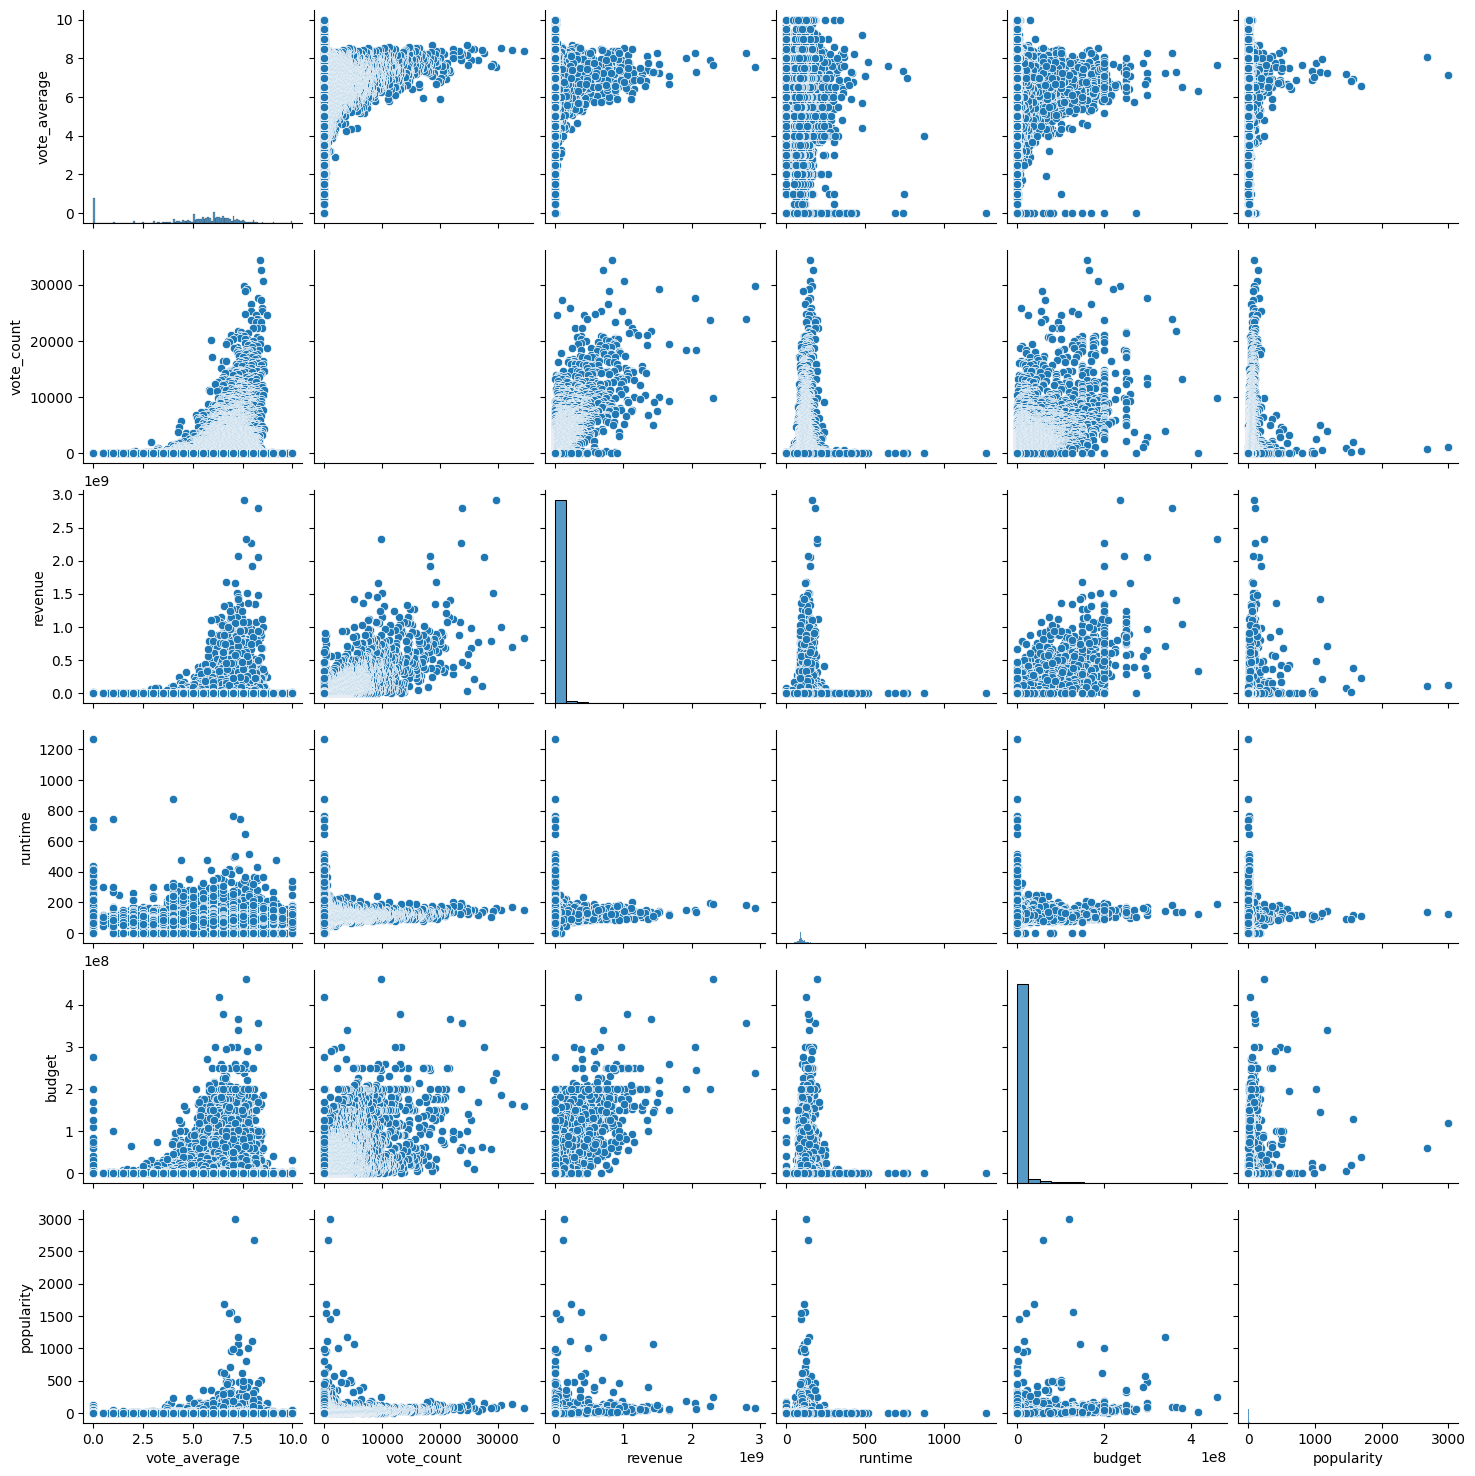

In [17]:
# Selecting a subset of columns for pair plotting
subset = movies_df[['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']]

# Creating pair plots
sns.pairplot(subset)
plt.show()


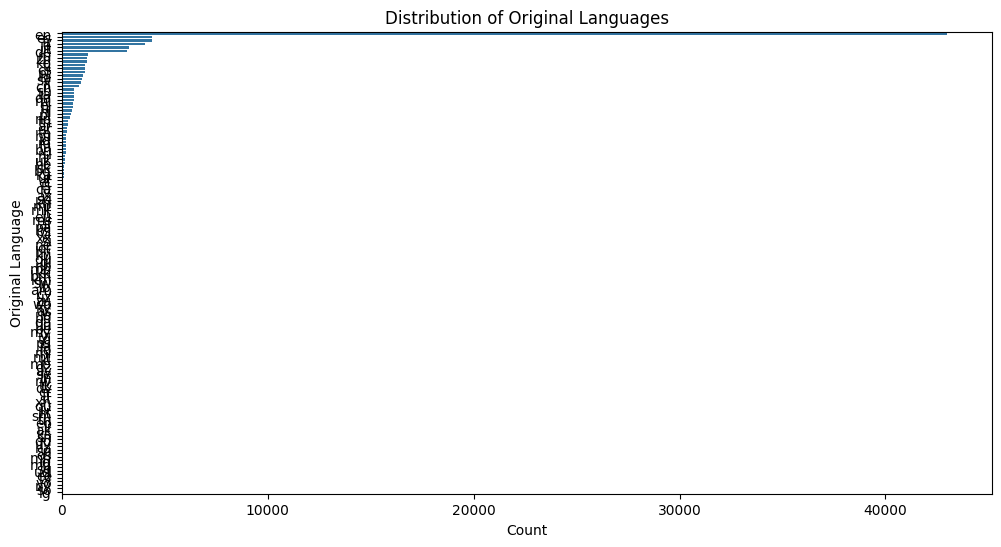

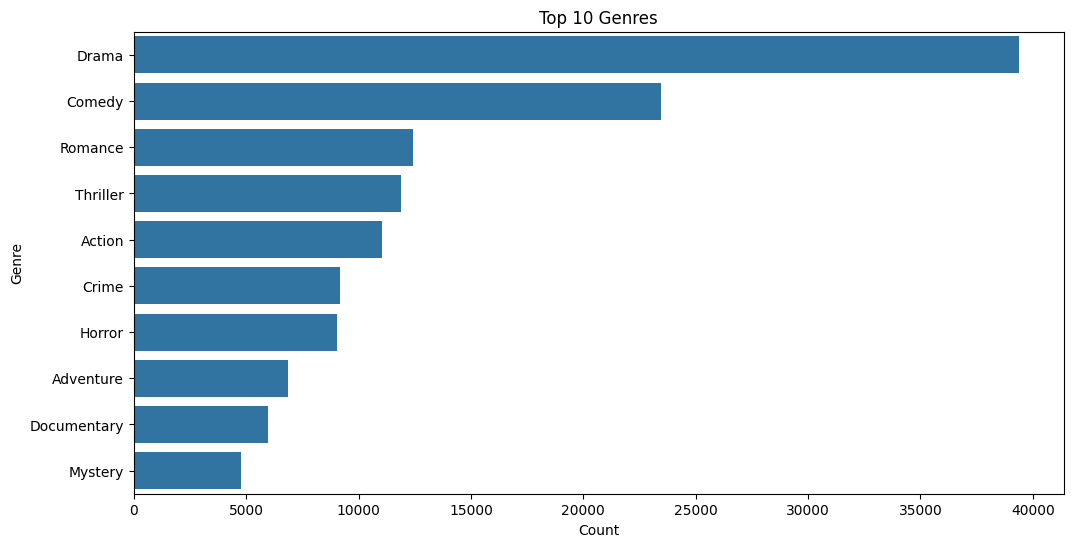

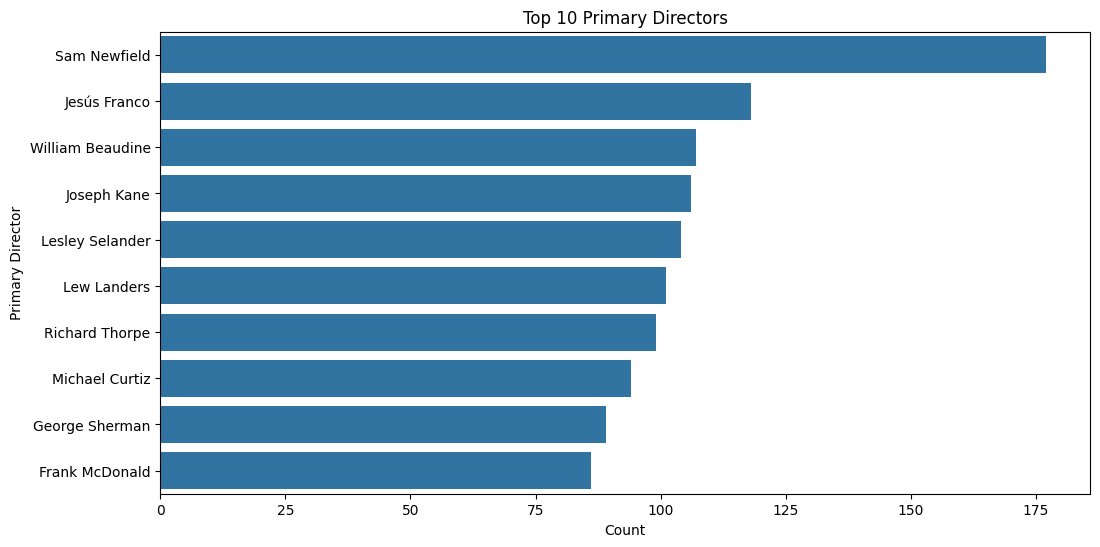

In [18]:
# Plotting the distribution of original languages
plt.figure(figsize=(12, 6))
sns.countplot(y='original_language', data=movies_df, order=movies_df['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.show()

# Plotting the top 10 genres
plt.figure(figsize=(12, 6))
top_genres = movies_df['genres'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Plotting the top 10 primary directors
plt.figure(figsize=(12, 6))
top_directors = movies_df['primary_director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Primary Directors')
plt.xlabel('Count')
plt.ylabel('Primary Director')
plt.show()

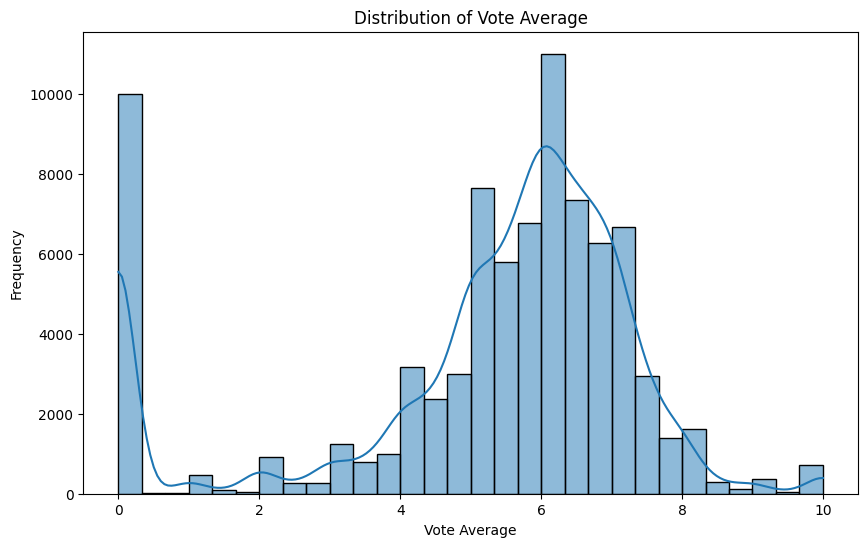

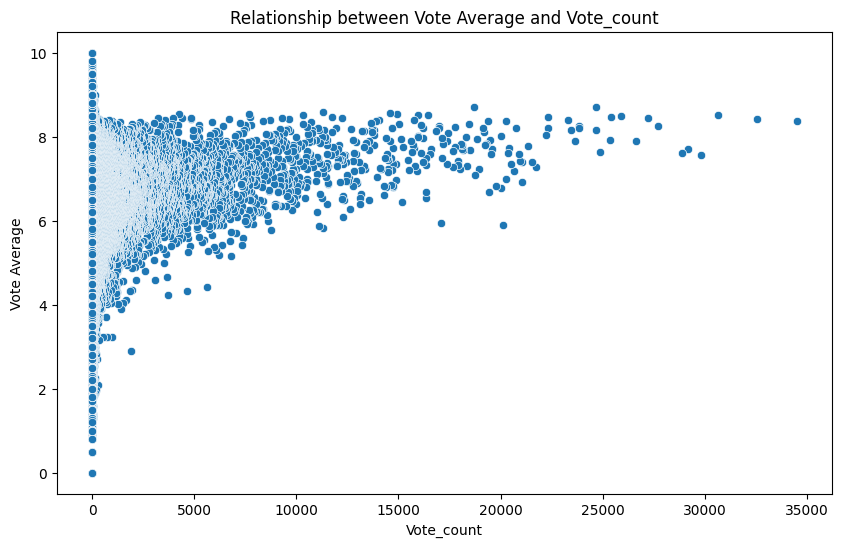

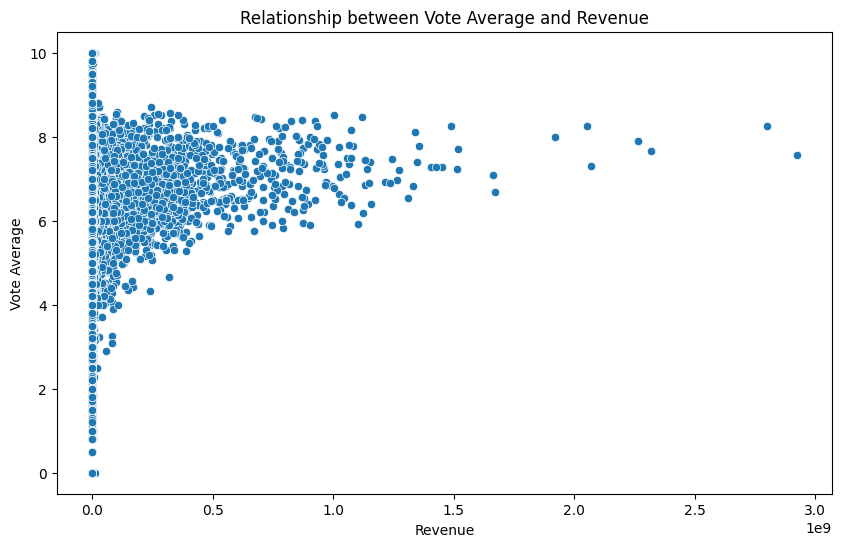

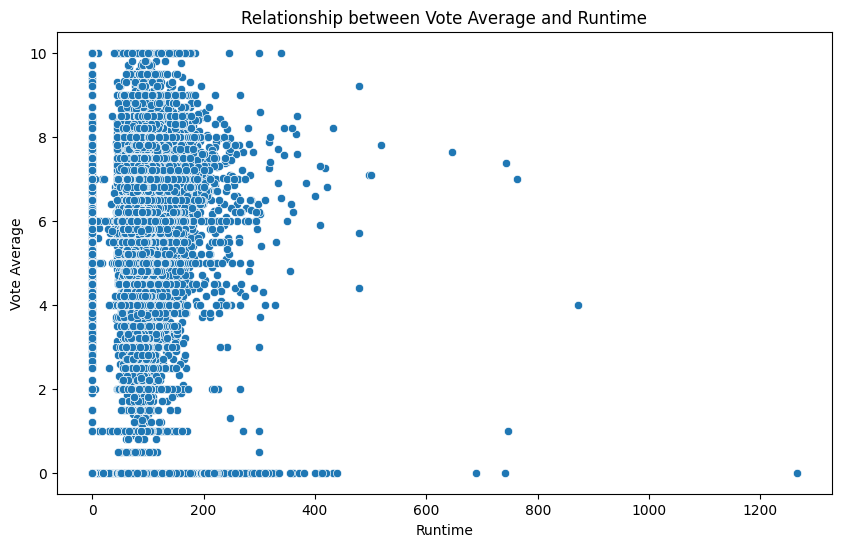

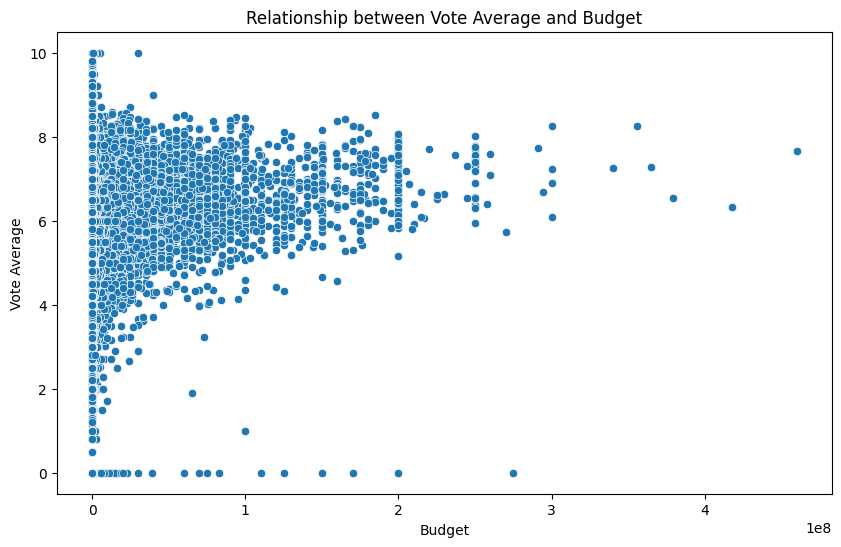

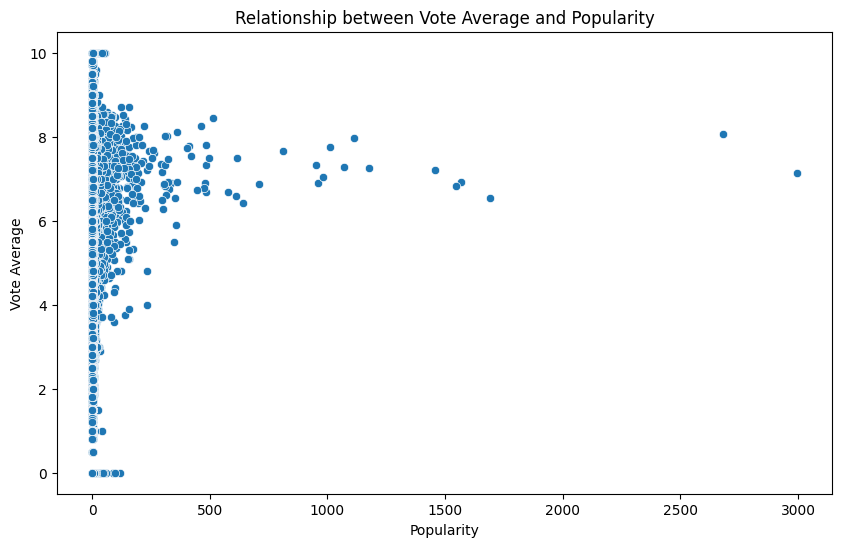

In [19]:
# Plotting the distribution of vote_average
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between vote_average and other numerical features
numerical_features = ['vote_count', 'revenue', 'runtime', 'budget', 'popularity']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=movies_df[feature], y=movies_df['vote_average'])
    plt.title(f'Relationship between Vote Average and {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Vote Average')
    plt.show()

APPLYING LABEL ENCODING TRANSFORMATION AS THE FIRST STEP TOWARDS MODEL TRAINING, 
WE WILL BE FOLLOWING OTHER RELEVANT STEPS TO IMPROVE MODEL'S ACCURACY

In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.364,34495,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.417,32571,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.512,30619,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.573,29815,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.710,29166,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [22]:
movies_df = movies_df.drop(columns=['directors'], axis=1)

In [23]:

# List of categorical columns
categorical_columns = ['original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'adult', 'writers', 'primary_director']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    movies_df[column] = le.fit_transform(movies_df[column])
    label_encoders[column] = le

movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director
0,8.364,34495,825532764,148,0,160000000,24,83.952,617,26771,4005,1142,49628,11296,5635
1,8.417,32571,701729206,169,0,165000000,24,140.241,1008,26770,4005,822,49578,33871,5635
2,8.512,30619,1004558444,152,0,185000000,24,130.643,2560,12236,4005,1587,30838,33873,5635
3,7.573,29815,2923706026,162,0,237000000,24,79.932,146,14168,4181,1744,22215,28886,13325
4,7.710,29166,1518815515,143,0,220000000,24,98.082,4524,29825,4038,1384,40918,34694,15951


In [24]:
movies_df.describe()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director
count,82703.000000,82703.000000,8.270300e+04,82703.000000,82703.000000,8.270300e+04,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000
mean,5.185295,230.055935,8.360483e+06,92.847333,0.005078,3.083847e+06,38.622795,5.890876,2632.212640,27840.303677,3087.846741,1671.038463,33111.788073,35095.170816,16879.227791
std,2.309306,1156.868330,5.868179e+07,30.269645,0.071082,1.552116e+07,28.300713,24.375741,1229.292524,15553.311788,1131.244502,1004.908787,19347.264604,20230.907937,9559.401168
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.664500,2.000000,0.000000e+00,82.000000,0.000000,0.000000e+00,24.000000,1.162000,1853.000000,14406.500000,2513.000000,822.000000,16155.500000,17557.500000,8898.000000
50%,5.833000,9.000000,0.000000e+00,93.000000,0.000000,0.000000e+00,24.000000,2.253000,2536.000000,29235.000000,3630.000000,1007.000000,33567.000000,35131.000000,16733.000000
75%,6.647000,49.000000,0.000000e+00,105.000000,0.000000,0.000000e+00,46.000000,6.038000,3246.000000,41074.000000,4038.000000,2690.000000,50016.500000,52627.500000,25382.000000
max,10.000000,34495.000000,2.923706e+09,1265.000000,1.000000,4.600000e+08,131.000000,2994.357000,5288.000000,53804.000000,4233.000000,3500.000000,65039.000000,69980.000000,33298.000000


<Axes: >

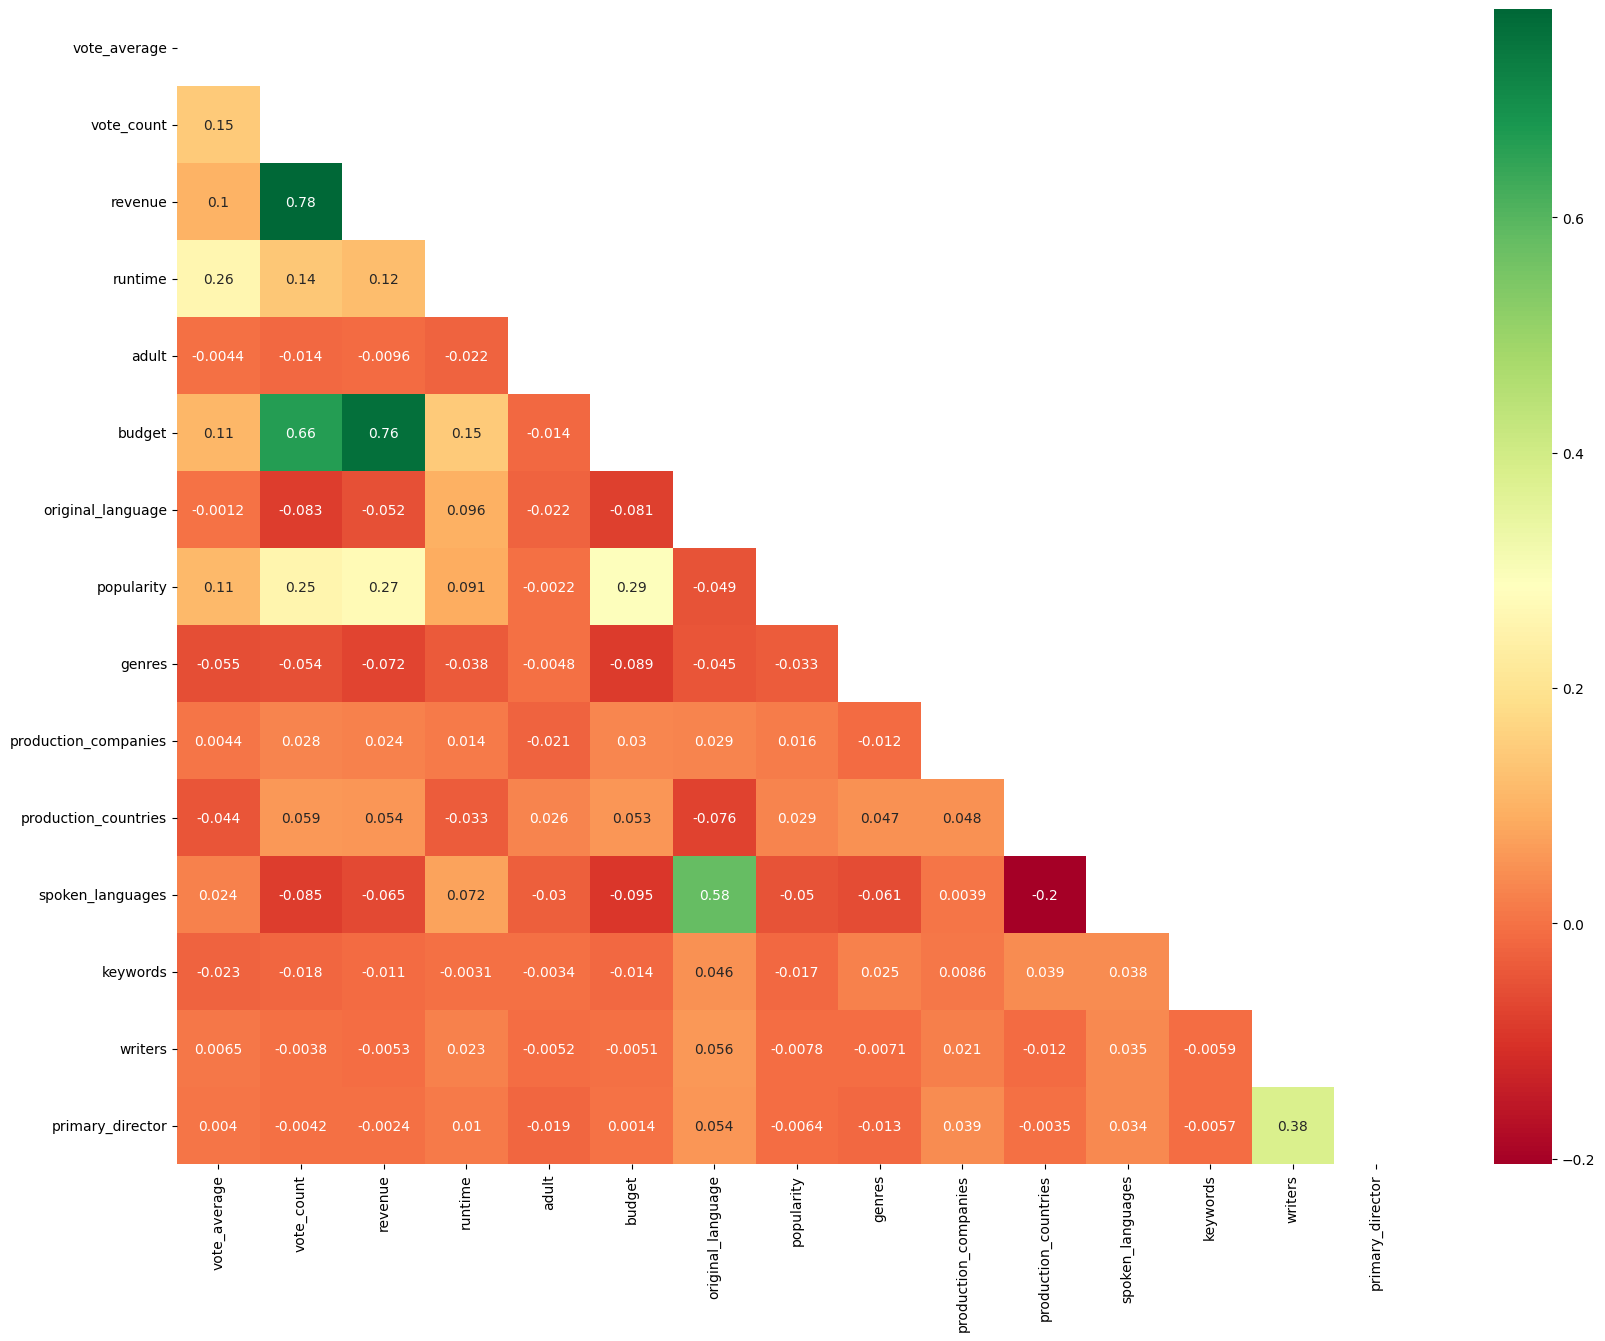

In [25]:
corr = movies_df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [26]:
# removing revenue as it brings multicollinearity in the dataset
movies_df.drop(columns=['revenue'],inplace=True)

In [27]:
# Creating bins to convert the rating column(vote_average) into a binary column
movies_df['target'] = pd.cut(movies_df['vote_average'], bins = [-float('inf'), 4, 7, float('inf')], labels=['Flop', 'Average', 'Hit'])
# Bins are created as
# -> Flop: Rating less than 4
# -> Average: Rating between 4 and 7
# -> Hit: Rating greater than 7

In [28]:
movies_df['target'].value_counts()

target
Average    54092
Flop       16592
Hit        12019
Name: count, dtype: int64

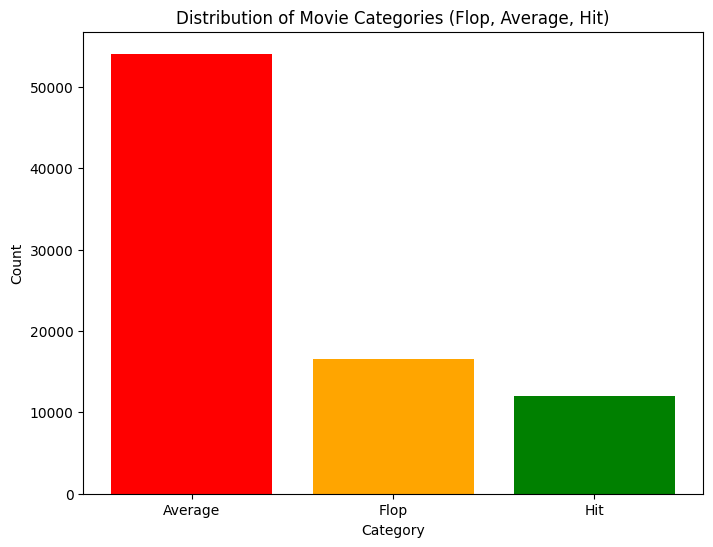

In [29]:
target_counts = movies_df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['red', 'orange', 'green'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Movie Categories (Flop, Average, Hit)')

# Show the plot
plt.show()

In [30]:
movies_df.drop(columns=['vote_average'],inplace=True)

In [31]:
movies_df.head()


,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director,target
0,34495,148,0,160000000,24,83.952,617,26771,4005,1142,49628,11296,5635,Hit
1,32571,169,0,165000000,24,140.241,1008,26770,4005,822,49578,33871,5635,Hit
2,30619,152,0,185000000,24,130.643,2560,12236,4005,1587,30838,33873,5635,Hit
3,29815,162,0,237000000,24,79.932,146,14168,4181,1744,22215,28886,13325,Hit
4,29166,143,0,220000000,24,98.082,4524,29825,4038,1384,40918,34694,15951,Hit


Model building starting
Starting with lazy predictor
reference link: https://github.com/shankarpandala/lazypredict?authuser=0

In [32]:

X = movies_df.drop(columns=['target'], axis=1)
y = movies_df['target']
# Encode the target variable y


In [33]:
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:\n", y.isna().sum())

Missing values in X:
 vote_count              0
runtime                 0
adult                   0
budget                  0
original_language       0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
writers                 0
primary_director        0
dtype: int64
Missing values in y:
 0


In [34]:
print(X.head())
print(y.head())

   vote_count  runtime  adult     budget  original_language  popularity  \
0       34495      148      0  160000000                 24      83.952   
1       32571      169      0  165000000                 24     140.241   
2       30619      152      0  185000000                 24     130.643   
3       29815      162      0  237000000                 24      79.932   
4       29166      143      0  220000000                 24      98.082   

   genres  production_companies  production_countries  spoken_languages  \
0     617                 26771                  4005              1142   
1    1008                 26770                  4005               822   
2    2560                 12236                  4005              1587   
3     146                 14168                  4181              1744   
4    4524                 29825                  4038              1384   

   keywords  writers  primary_director  
0     49628    11296              5635  
1     49578    3

In [35]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, columns=['target'])

In [36]:
print(label_encoder.classes_)

['Average' 'Flop' 'Hit']


In [37]:
y.head()


,target
0,2
1,2
2,2
3,2
4,2


In [38]:
y.value_counts()

target
0         54092
1         16592
2         12019
Name: count, dtype: int64

In [39]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


In [40]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and run LazyClassifiertask with no custom metrics
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 30/31 [24:07<00:27, 27.35s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2892
[LightGBM] [Info] Number of data points in the train set: 57892, number of used features: 13
[LightGBM] [Info] Start training from score -0.423496
[LightGBM] [Info] Start training from score -1.602329
[LightGBM] [Info] Start training from score -1.939196


100%|██████████| 31/31 [24:08<00:00, 46.73s/it]


In [41]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.79,0.62,None,0.77,1.94
LGBMClassifier,0.79,0.61,None,0.76,1.57
BaggingClassifier,0.77,0.61,None,0.75,5.28
DecisionTreeClassifier,0.69,0.60,None,0.69,0.84
RandomForestClassifier,0.79,0.60,None,0.75,16.84
ExtraTreesClassifier,0.77,0.57,None,0.73,5.67
AdaBoostClassifier,0.77,0.56,None,0.72,3.55
ExtraTreeClassifier,0.62,0.51,None,0.62,0.10
NearestCentroid,0.47,0.50,None,0.49,0.09


In [42]:
## TRYING LAZY predict with one hot encoding
movies_df_ohe = pd.read_csv('.\Dataset\data\movies_cleaned_80k.csv')


In [43]:
movies_df_ohe.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.36,34495,825532764,148,False,160000000,en,83.95,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.42,32571,701729206,169,False,165000000,en,140.24,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.51,30619,1004558444,152,False,185000000,en,130.64,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.57,29815,2923706026,162,False,237000000,en,79.93,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.71,29166,1518815515,143,False,220000000,en,98.08,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [44]:
movies_df_ohe.drop(columns=['directors'], axis=1, inplace=True)
movies_df_ohe.drop(columns=['revenue'], axis=1, inplace=True)
# Creating bins to convert the vote_average column into a categorical column
movies_df_ohe['target'] = pd.cut(movies_df_ohe['vote_average'], bins=[0, 4, 6, 10], labels=['Flop', 'Average', 'Hit'])

# Dropping the vote_average column as it is no longer needed
movies_df_ohe.drop(columns=['vote_average'], axis=1, inplace=True)


In [45]:
movies_df_ohe.head()

,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director,target
0,34495,148,False,160000000,en,83.95,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Hit
1,32571,169,False,165000000,en,140.24,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...","Jonathan Nolan, Christopher Nolan",Christopher Nolan,Hit
2,30619,152,False,185000000,en,130.64,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...","Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan,Hit
3,29815,162,False,237000000,en,79.93,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,Hit
4,29166,143,False,220000000,en,98.08,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...","Joss Whedon, Zak Penn",Joss Whedon,Hit


In [46]:
# ## ONE HOT ENCODING TAKES SIGNIFICANT TIME AND SPACE TO EXEUCTE, THUS NOT FOLLOWING THIS APPROACH


# # List of categorical columns
# categorical_columns = ['original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'adult', 'writers', 'primary_director', 'target']


# # Apply One Hot Encoding to each categorical column
# movies_df = pd.get_dummies(movies_df, columns=categorical_columns)

# # Display the first few rows of the dataframe
# movies_df.head()

Best ML model algorithm for this scenario appers to be these
-                         Accuracy	Balanced Accuracy	ROC AUC	   F1 Score	   Time Taken
  Model					
- XGBClassifier	            0.79	         0.62	        None	      0.77	     1.42
- LGBMClassifier	          0.79	         0.61	        None	      0.76	     1.27
- BaggingClassifier	        0.77	         0.61	        None	      0.75	     15.52
- DecisionTreeClassifier	  0.69	         0.60	        None	      0.69	     2.98
- RandomForestClassifier	  0.79	         0.60	        None	      0.75	     17.12

In [47]:
# Initializing and training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     16187
           1       0.68      0.69      0.68      4931
           2       0.33      0.34      0.34      3693

    accuracy                           0.69     24811
   macro avg       0.60      0.60      0.60     24811
weighted avg       0.70      0.69      0.69     24811

Confusion Matrix:
[[12510  1358  2319]
 [ 1290  3410   231]
 [ 2153   272  1268]]


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Initialize and fit the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Make predictions
y_pred = random_forest.predict(X_test)

In [52]:

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     16187
           1       0.92      0.64      0.76      4931
           2       0.68      0.19      0.30      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.60      0.64     24811
weighted avg       0.79      0.79      0.75     24811

Confusion Matrix:
[[15693   188   306]
 [ 1761  3154    16]
 [ 2928    68   697]]


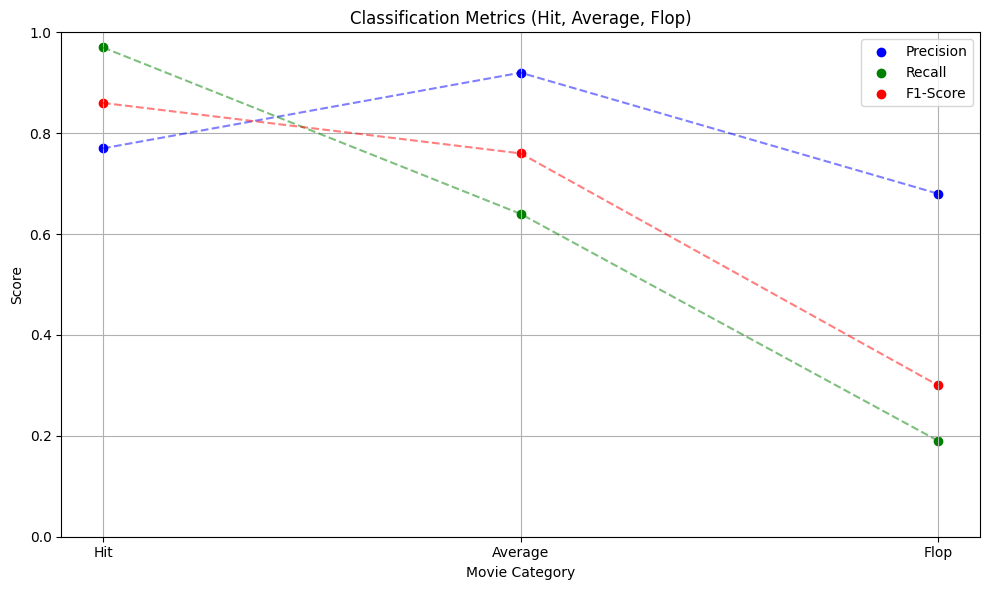

In [53]:
#Classification Graphs:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Hit', 'Average', 'Flop']
precision = [0.77, 0.92, 0.68]
recall = [0.97, 0.64, 0.19]
f1_score = [0.86, 0.76, 0.30]

plt.figure(figsize=(10, 6))
x = np.arange(len(classes))

plt.scatter(x, precision, label="Precision", color='blue')
plt.scatter(x, recall, label="Recall", color='green')
plt.scatter(x, f1_score, label="F1-Score", color='red')

plt.plot(x, precision, color='blue', linestyle='--', alpha=0.5)
plt.plot(x, recall, color='green', linestyle='--', alpha=0.5)
plt.plot(x, f1_score, color='red', linestyle='--', alpha=0.5)

plt.title("Classification Metrics (Hit, Average, Flop)")
plt.xticks(x, classes)
plt.xlabel('Movie Category')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


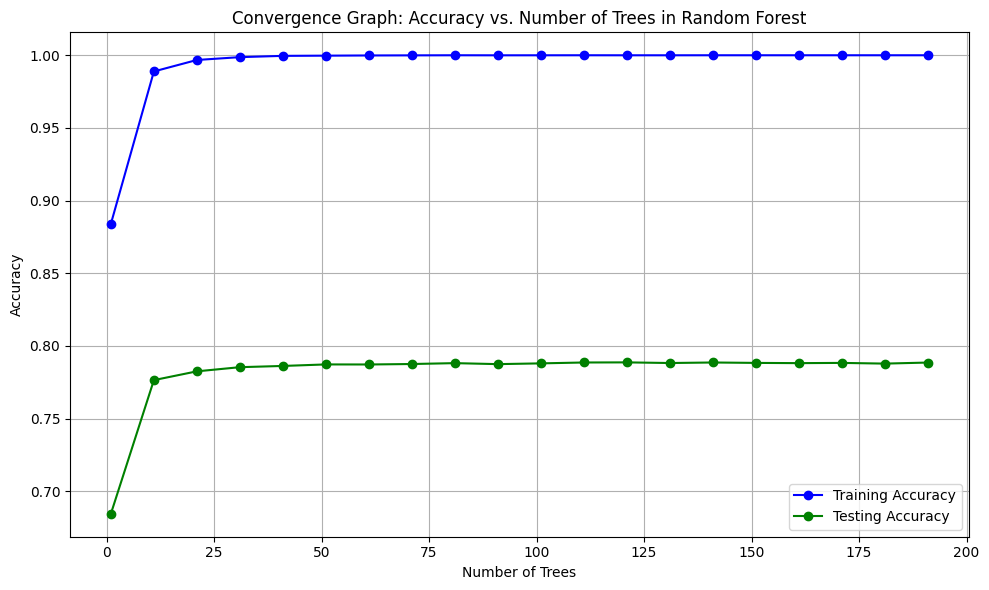

In [54]:
#Convergence Graphs:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimators_range = np.arange(1, 201, 10)
train_accuracies = []
test_accuracies = []

for n_estimators in estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(estimators_range, test_accuracies, label='Testing Accuracy', marker='o', color='green')

plt.title('Convergence Graph: Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [55]:
print("Based on the RF report, we can conclude that")
print("""
Class 0 (Flop): Precision = 0.77, meaning that 77% of the instances predicted as class 0 were actually class 0.
Class 1 (Average): Precision = 0.92, indicating that 92% of the instances predicted as class 1 were correct.
Class 2 (Hit): Precision = 0.68, meaning that 68% of instances predicted as class 2 were indeed class 2.

      
Class 0: Recall = 0.97, meaning the model correctly identified 97% of the actual class 0 instances.
Class 1: Recall = 0.64, indicating that 64% of the actual class 1 instances were correctly identified.
Class 2: Recall = 0.19, meaning only 19% of the actual class 2 instances were correctly identified.

Other scsores are F1(To balance precision and recall) and Support(No of instances in each class)

Overall, accuracy comes out to be 79 percent. which is same as the accuracy we got using the lazy predict
""")

Based on the RF report, we can conclude that

Class 0 (Flop): Precision = 0.77, meaning that 77% of the instances predicted as class 0 were actually class 0.
Class 1 (Average): Precision = 0.92, indicating that 92% of the instances predicted as class 1 were correct.
Class 2 (Hit): Precision = 0.68, meaning that 68% of instances predicted as class 2 were indeed class 2.

      
Class 0: Recall = 0.97, meaning the model correctly identified 97% of the actual class 0 instances.
Class 1: Recall = 0.64, indicating that 64% of the actual class 1 instances were correctly identified.
Class 2: Recall = 0.19, meaning only 19% of the actual class 2 instances were correctly identified.

Other scsores are F1(To balance precision and recall) and Support(No of instances in each class)

Overall, accuracy comes out to be 79 percent. which is same as the accuracy we got using the lazy predict



In [56]:

# Feature Importances
importances = random_forest.feature_importances_
indices = range(len(importances))

In [57]:
print(importances)
print("Now, based on these scorings, we can consider the fact that features like 'adult', 'budget', 'original_language' are the ones that contributes the least among all other features.")

[0.32469752 0.08213915 0.0012491  0.02239396 0.02779957 0.11835083
 0.06949921 0.0688242  0.03822338 0.03738335 0.07021276 0.07033448
 0.0688925 ]
Now, based on these scorings, we can consider the fact that features like 'adult', 'budget', 'original_language' are the ones that contributes the least among all other features.


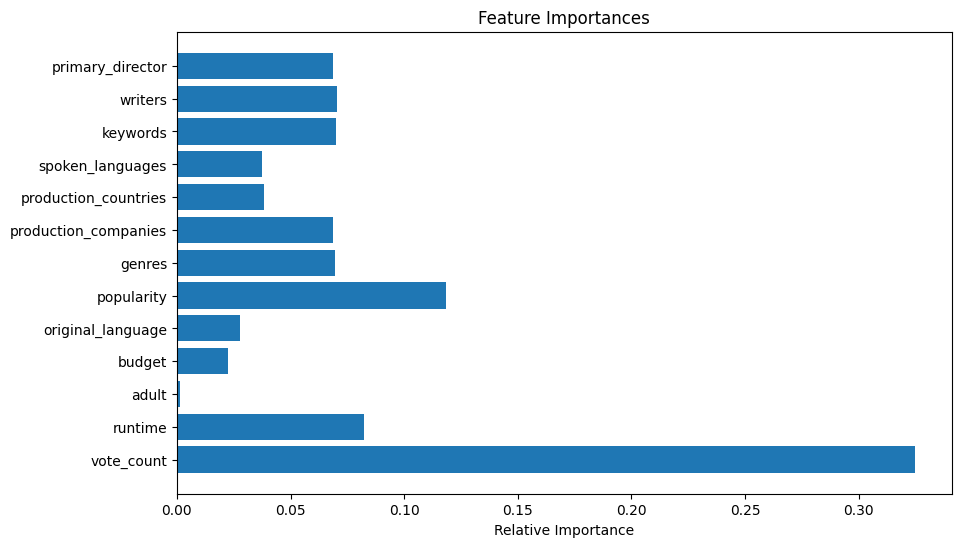

In [58]:

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(indices, importances, align='center')
plt.yticks(indices, movies_df.columns[:-1])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# List of selected features
selected_features = [
    'primary_director', 'writers', 'keywords', 'spoken_languages', 
    'production_countries', 'production_companies', 'genres', 
    'popularity', 'runtime', 'vote_count'
]

# Create a new DataFrame with the selected features
new_X_df = X_train[selected_features]
new_y_df = y_train['target']

# Create new DataFrames for the train and test datasets with the selected features
new_X_test = X_test[selected_features]
new_y_test = y_test

# Display the first few rows of the new DataFrame
print(new_X_df.head())
print(new_y_df.head())


        primary_director  writers  keywords  spoken_languages  \
349053              9370    12678      1861              2620   
72101               4374    33173     20841               822   
52440              11180    23845     32903              1671   
89530              26726    56741     39142               822   
38795              16331    35549      7433              3272   

        production_countries  production_companies  genres  popularity  \
349053                  1970                 16342    2536        3.19   
72101                   4038                 49207     484        2.86   
52440                   2703                 44406    2092        6.24   
89530                    198                   278    3705        1.15   
38795                   2375                 23412    4388        1.98   

        runtime  vote_count  
349053       91           1  
72101        83          11  
52440        99          18  
89530        85           8  
38795        8

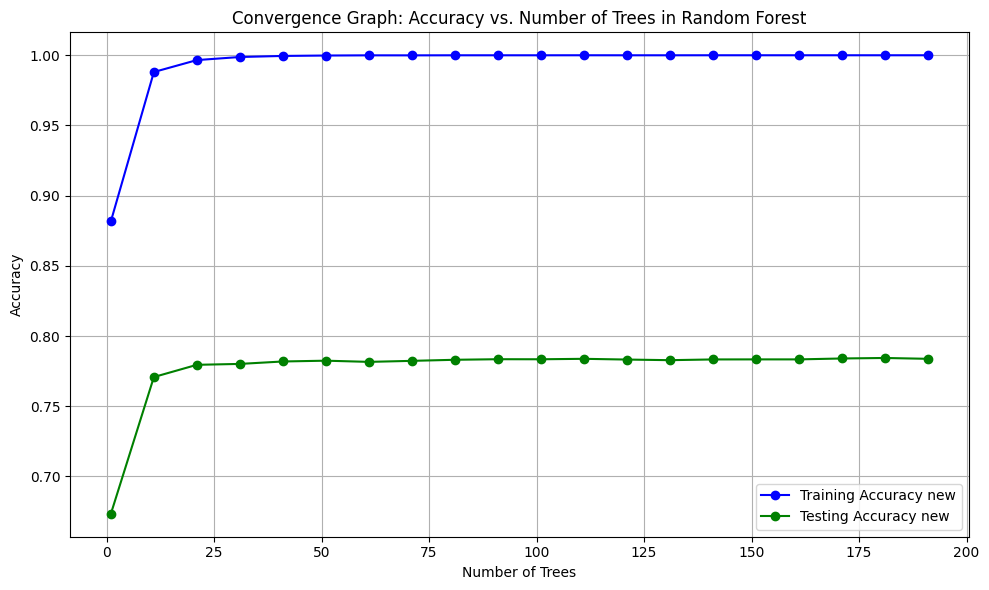

In [69]:
#Convergence Graphs:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimators_range_new = np.arange(1, 201, 10)
train_accuracies_new = []
test_accuracies_new = []

for n_estimators in estimators_range_new:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf.fit(new_X_df, new_y_df)
    
    train_acc_new = accuracy_score(new_y_df, rf.predict(new_X_df))
    test_acc_new = accuracy_score(new_y_test, rf.predict(new_X_test))
    
    train_accuracies_new.append(train_acc_new)
    test_accuracies_new.append(test_acc_new)

plt.figure(figsize=(10, 6))
plt.plot(estimators_range_new, train_accuracies_new, label='Training Accuracy new', marker='o', color='blue')
plt.plot(estimators_range_new, test_accuracies_new, label='Testing Accuracy new', marker='o', color='green')

plt.title('Convergence Graph: Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
print("Training Accuracy of new Random Forest model:", train_acc_new)
print("Testing Accuracy of new Random Forest model:", test_acc_new)

# Initialize and fit the Random Forest Classifier with regularization
# 
random_forest_reg = RandomForestClassifier(
    random_state=42,
    max_depth=10,  # Limit the depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5  # Minimum number of samples required to be at a leaf node
)
random_forest_reg.fit(new_X_df, new_y_df)

# Make predictions
y_pred_reg = random_forest_reg.predict(new_X_test)

# Evaluate the model
print("Classification Report with Regularization:")
print(classification_report(new_y_test, y_pred_reg))

print("Confusion Matrix with Regularization:")
print(confusion_matrix(new_y_test, y_pred_reg))



Training Accuracy of new Random Forest model: 1.0
Testing Accuracy of new Random Forest model: 0.783765265406473
Classification Report with Regularization:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86     16187
           1       0.99      0.61      0.75      4931
           2       0.74      0.09      0.17      3693

    accuracy                           0.78     24811
   macro avg       0.83      0.56      0.59     24811
weighted avg       0.80      0.78      0.73     24811

Confusion Matrix with Regularization:
[[16046    22   119]
 [ 1934  2995     2]
 [ 3338    11   344]]


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_new_rf = accuracy_score(new_y_test, y_pred_reg)
print(f"Accuracy of the new Random Forest model: {accuracy_new_rf}")


# Calculate training accuracy
train_accuracy_new_rf = accuracy_score(new_y_df, random_forest_reg.predict(new_X_df))
print(f"Training Accuracy of the new Random Forest model: {train_accuracy_new_rf}")


Accuracy of the new Random Forest model: 0.7813066784893797
Training Accuracy of the new Random Forest model: 0.7926311061977476


After applying some restrictions on the random forest, The trainig accuracy is now stabilised and more generalised. 


Now, Applying XG boost on both the entire dataset and the new selected features dataset.

In [80]:
X_test.head()

,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director
20796,81,107,0,0,33,6.37,905,27332,1970,1029,41425,42247,19610
5153,682,109,0,0,24,9.77,3043,7554,2156,822,5699,48520,14611
61347,14,82,0,0,24,2.23,5177,24581,4038,822,43438,35431,8167
34741,35,148,0,0,111,5.83,168,47072,2665,3410,50250,47682,22375
9996,256,95,0,0,24,12.37,1911,21895,4038,822,19299,50762,29266


In [81]:
# Import necessary libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Train and evaluate XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
xgb_report = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)


print("XGBClassifier Results:")
print(f"Accuracy: {xgb_accuracy}")
print(f"F1 Score: {xgb_f1}")
print(xgb_report)




XGBClassifier Results:
Accuracy: 0.7898915803474266
F1 Score: 0.7657440537493988
              precision    recall  f1-score   support

     Average       0.78      0.95      0.86     16187
        Flop       0.91      0.65      0.76      4931
         Hit       0.63      0.26      0.37      3693

    accuracy                           0.79     24811
   macro avg       0.77      0.62      0.66     24811
weighted avg       0.78      0.79      0.77     24811



Now, trying the same XGboost for the selected features

In [84]:

# Train and evaluate XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(new_X_df, new_y_df)

y_pred_xgb = xgb_clf.predict(new_X_test)

xgb_accuracy = accuracy_score(new_y_test, y_pred_xgb)
# Calculate performance metrics for the training dataset
# Predictions on the training dataset
y_pred_train_xgb = xgb_clf.predict(new_X_df)
xgb_train_accuracy = accuracy_score(new_y_df, y_pred_train_xgb)


xgb_f1 = f1_score(new_y_test, y_pred_xgb, average='weighted')
xgb_report = classification_report(new_y_test, y_pred_xgb, target_names=label_encoder.classes_)



In [ ]:
print("XGBClassifier Results:")
print("Test dataset scores")
print(f"Accuracy: {xgb_accuracy}")
print(f"F1 Score: {xgb_f1}")
print(xgb_report)

print("Train dataset scores")
print(f"Accuracy: {xgb_train_accuracy}")


XGBClassifier Results:
Test dataset scores
Accuracy: 0.7849341018096812
F1 Score: 0.7573243174794654
              precision    recall  f1-score   support

     Average       0.78      0.95      0.86     16187
        Flop       0.90      0.65      0.75      4931
         Hit       0.62      0.23      0.33      3693

    accuracy                           0.78     24811
   macro avg       0.76      0.61      0.65     24811
weighted avg       0.78      0.78      0.76     24811

Train dataset scores
Accuracy: 0.8467145719615836


Now, we can see the selected features having lesser number of features than the original dataset. 
We can say that there is not a negative tradeoff, between the data complexity and accuracy
THere is a very slight dip in the accuracy as compared to previous accuracy.

However, there is a significant improvement in the training accuracy as compared to other models


In [87]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=42)

# Train the model using the training dataset
lgbm_clf.fit(new_X_df, new_y_df)

# Predict on the training dataset
y_pred_train_lgbm = lgbm_clf.predict(new_X_df)

# Predict on the testing dataset
y_pred_test_lgbm = lgbm_clf.predict(new_X_test)

# Calculate training accuracy
lgbm_train_accuracy = accuracy_score(new_y_df, y_pred_train_lgbm)

# Calculate testing accuracy
lgbm_test_accuracy = accuracy_score(new_y_test, y_pred_test_lgbm)

# Calculate F1 score for the test set
lgbm_test_f1 = f1_score(new_y_test, y_pred_test_lgbm, average='weighted')

# Generate classification report for the test set
lgbm_test_report = classification_report(new_y_test, y_pred_test_lgbm, target_names=label_encoder.classes_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 57892, number of used features: 10
[LightGBM] [Info] Start training from score -0.423496
[LightGBM] [Info] Start training from score -1.602329
[LightGBM] [Info] Start training from score -1.939196


In [89]:

# Print results
print("LGBMClassifier Results:")
print(f"Training Accuracy: {lgbm_train_accuracy}")
print(f"Test Accuracy: {lgbm_test_accuracy}")
print(f"F1 Score (Test): {lgbm_test_f1}")
print("Classification Report (Test):")
print(lgbm_test_report)


LGBMClassifier Results:
Training Accuracy: 0.8129275202100463
Test Accuracy: 0.7874329934303334
F1 Score (Test): 0.756615382701537
Classification Report (Test):
              precision    recall  f1-score   support

     Average       0.77      0.97      0.86     16187
        Flop       0.93      0.63      0.76      4931
         Hit       0.65      0.21      0.31      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.60      0.64     24811
weighted avg       0.79      0.79      0.76     24811



NOW, applying GridSearchCV for finding best parameters for the models we performed

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    decision_tree, 
    param_grid, 
    scoring='f1_macro',  
    cv=5,                
    verbose=1,           
    n_jobs=-1            
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1)

In [91]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy:.2f}")

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 Macro Score: 0.6336893128486975
    param_max_depth  param_min_samples_split  param_min_samples_leaf  \
0                 5                        2                       1   
1                 5                        5                       1   
2                 5                       10                       1   
3                 5                        2                       2   
4                 5                        5                       2   
5                 5                       10                       2   
6                 5                        2                       4   
7                 5                        5                       4   
8                 5                       10                       4   
9                10                        2                       1   
10               10                        5                       1   
11            

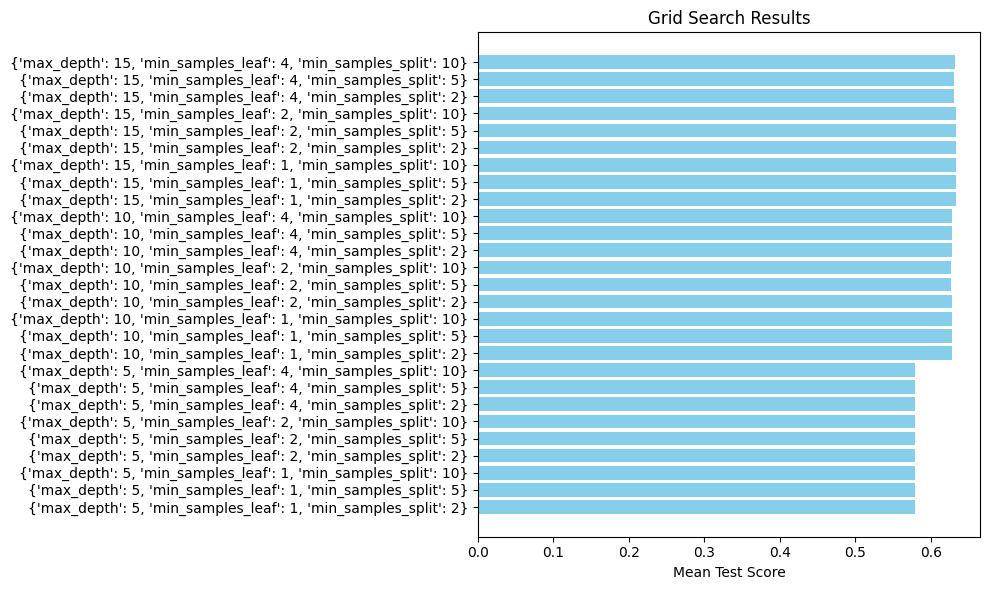

In [92]:
results = grid_search.cv_results_

# Extract mean test scores for each combination of parameters
mean_test_scores = results['mean_test_score']
param_grid = results['params']

# Extract the hyperparameters used for grid search
param_combinations = [str(param) for param in param_grid]

# Plot the grid search results
plt.figure(figsize=(10, 6))
plt.barh(param_combinations, mean_test_scores, color='skyblue')
plt.xlabel('Mean Test Score')
plt.title('Grid Search Results')
plt.tight_layout()
plt.show()

In [95]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(decision_tree, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

print("Accuracy for each fold:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean()}")

Accuracy for each fold: [0.75878121 0.76295266 0.76252947 0.76269649 0.76033857]
Mean Accuracy: 0.7614596824262924


Now, After applying Grid searchCV for hyper parameters tweening and kfold cross validation on 
decision tree model for best possilbe results(As per our knowledge).

The decision tree accuracy jumped form 69 perc to 76 percent.

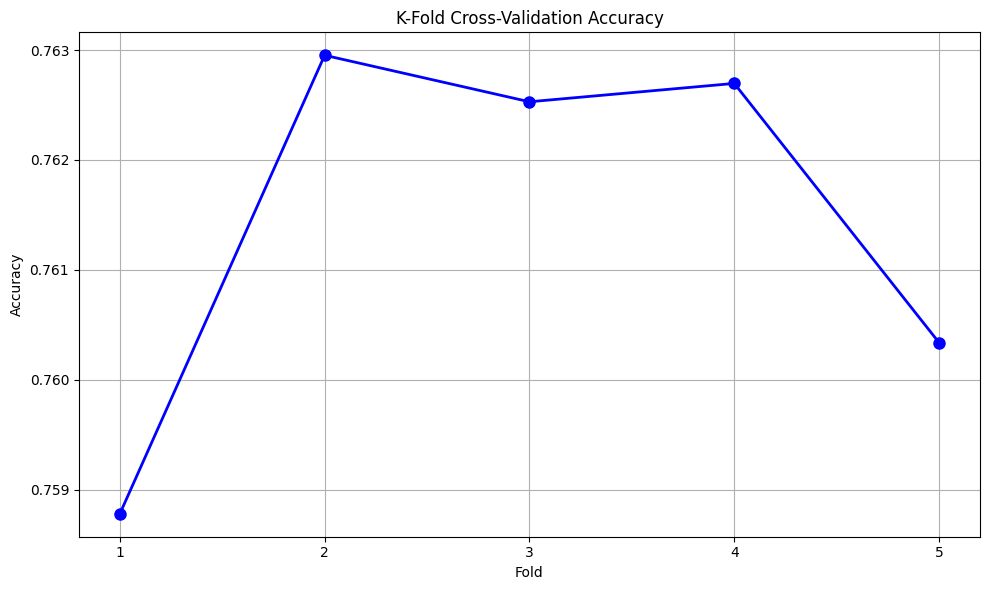

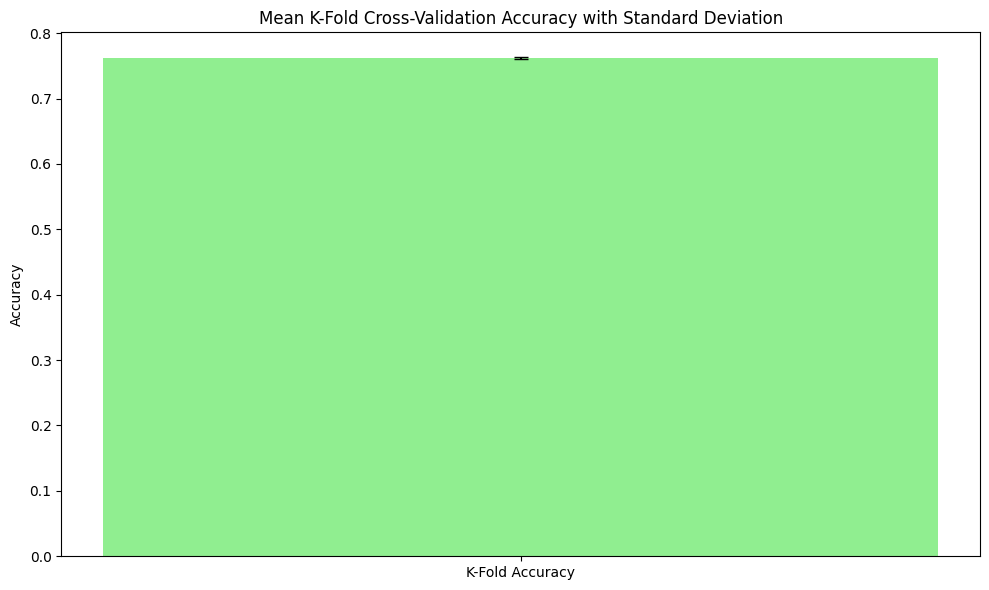

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy')
plt.xticks(range(1, 6))
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, plot mean and standard deviation
plt.figure(figsize=(10, 6))
plt.bar([0], [cv_scores.mean()], yerr=cv_scores.std(), color='lightgreen', capsize=5)
plt.xticks([0], ['K-Fold Accuracy'])
plt.ylabel('Accuracy')
plt.title('Mean K-Fold Cross-Validation Accuracy with Standard Deviation')
plt.tight_layout()
plt.show()

Now, applying the same GridsearchCV and K fold on random forest classifier


In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # The number of features to consider for best split
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(new_X_df, new_y_df)

# Best parameters from GridSearchCV
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Train the model with best parameters
best_rf = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_reg = best_rf.predict(new_X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(new_y_df, best_rf.predict(new_X_df))

# Evaluate the model on testing data
test_accuracy = accuracy_score(new_y_test, y_pred_reg)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Classification Report with Regularization (Grid Search Tuning)
print("Classification Report with Regularization (Grid Search Tuning):")
print(classification_report(new_y_test, y_pred_reg))

# Confusion Matrix with Regularization (Grid Search Tuning)
print("Confusion Matrix with Regularization (Grid Search Tuning):")
print(confusion_matrix(new_y_test, y_pred_reg))

# Apply K-Fold Cross-Validation to the Random Forest model
cv_scores = cross_val_score(best_rf, new_X_df, new_y_df, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters from Grid Search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Training Accuracy: 0.9304739860429766
Testing Accuracy: 0.7855386723630647
Classification Report with Regularization (Grid Search Tuning):
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     16187
           1       0.94      0.63      0.76      4931
           2       0.67      0.17      0.28      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.59      0.63     24811
weighted avg       0.79      0.79      0.75     24811

Confusion Matrix with Regularization (Grid Search Tuning):
[[15731   156   300]
 [ 1800  3119    12]
 [ 2998    55   640]]
Cross-Validation Scores: [0.78884187 0.79186458 0.78726896 0.78787355 0.79227846]
Mean Cross-Validation Score: 0.7896254844282028


In [98]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier

# Initialize XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameters to tune in GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5, 10, None],   # Maximum depth of the tree
    'learning_rate': [0.01, 0.05],  # Learning rate
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features to use for each tree
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(new_X_df, new_y_df)

# Best parameters from GridSearchCV
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Train the model with best parameters
best_xgb = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_xgb = best_xgb.predict(new_X_test)

# Evaluate the model on testing data
xgb_accuracy = accuracy_score(new_y_test, y_pred_xgb)
xgb_f1 = f1_score(new_y_test, y_pred_xgb, average='weighted')

# Print results
print("XGBClassifier Results:")
print("Test dataset scores")
print(f"Accuracy: {xgb_accuracy}")
print(f"F1 Score: {xgb_f1}")
print(classification_report(new_y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Apply K-Fold Cross-Validation to the XGBClassifier model
cv_scores = cross_val_score(best_xgb, new_X_df, new_y_df, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
XGBClassifier Results:
Test dataset scores
Accuracy: 0.7866268993591552
F1 Score: 0.7538786714708824
              precision    recall  f1-score   support

     Average       0.77      0.97      0.86     16187
        Flop       0.93      0.63      0.76      4931
         Hit       0.66      0.19      0.30      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.60      0.64     24811
weighted avg       0.79      0.79      0.75     24811

Cross-Validation Scores: [0.79091459 0.79290094 0.78830541 0.78830541 0.79081016]
Mean Cross-Validation Score: 0.7902472997835877


In [99]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=42)

# Hyperparameters to tune in GridSearchCV
param_grid = {
    'n_estimators': [50, 100],   # Number of trees in the forest
    'learning_rate': [0.01, 0.05],  # Learning rate for boosting
    'max_depth': [5, 10, None],  # Maximum depth of the tree
    'num_leaves': [31, 50],   # Maximum number of leaves in a tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features to use for each tree
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(new_X_df, new_y_df)

# Best parameters from GridSearchCV
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Train the model with best parameters
best_lgbm = grid_search.best_estimator_

# Make predictions with the tuned model on the test set
y_pred_test_lgbm = best_lgbm.predict(new_X_test)

# Evaluate the model on testing data
lgbm_test_accuracy = accuracy_score(new_y_test, y_pred_test_lgbm)
lgbm_test_f1 = f1_score(new_y_test, y_pred_test_lgbm, average='weighted')

# Print results
print("LGBMClassifier Results:")
print("Test dataset scores")
print(f"Test Accuracy: {lgbm_test_accuracy}")
print(f"F1 Score (Test): {lgbm_test_f1}")
print(classification_report(new_y_test, y_pred_test_lgbm, target_names=label_encoder.classes_))

# Apply K-Fold Cross-Validation to the LGBMClassifier model
cv_scores = cross_val_score(best_lgbm, new_X_df, new_y_df, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 57892, number of used features: 10
[LightGBM] [Info] Start training from score -0.423496
[LightGBM] [Info] Start training from score -1.602329
[LightGBM] [Info] Start training from score -1.939196
Best Parameters from Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 100, 'num_leaves': 50, 'subsample': 0.8}
LGBMClassifier Results:
Test dataset scores
Test Accuracy: 0.7871105558018621
F1 Score (Test): 0.7539995080843567
              precision    recall  f1-score   support

     Average       0.77      0.97      0.86     16187
        Flop       0.95      0.63      0.75      4931
         Hit       0.67      0.19      0.30      36

Applying Voting classifier based ensemble technique for (Decision Tree, Random forest, XGBoost, LGBM)

In [107]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Create a VotingClassifier (use soft voting if all models support predict_proba)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('xgb', xgboost),
        ('lgbm', lgbm)
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

# Train the ensemble model on the dataset with selected features
voting_clf.fit(new_X_df, new_y_df)

# Make predictions
y_pred_voting = voting_clf.predict(new_X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 57892, number of used features: 10
[LightGBM] [Info] Start training from score -0.423496
[LightGBM] [Info] Start training from score -1.602329
[LightGBM] [Info] Start training from score -1.939196


In [108]:

# Evaluate the ensemble model
accuracy_voting = accuracy_score(new_y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

# Classification report
print("Classification Report for Voting Classifier:")
print(classification_report(new_y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7873120793196566
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     16187
           1       0.93      0.63      0.76      4931
           2       0.66      0.20      0.30      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.60      0.64     24811
weighted avg       0.79      0.79      0.76     24811



PLOTTING FOR THE BEST LGBM MODEL

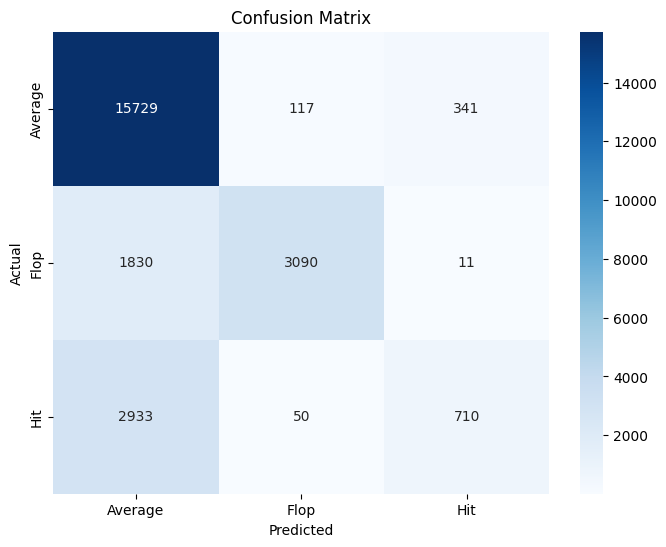

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(new_y_test, y_pred_test_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Since, the diagonal blocks represent the correct predictions, we can see that the model is performing 
# well for the Average category, but not so well for the Hit and Flop categories.
# This can be happen because of the imbalance in the dataset, 
# where the Average category has more instances compared to the Hit and Flop categories.


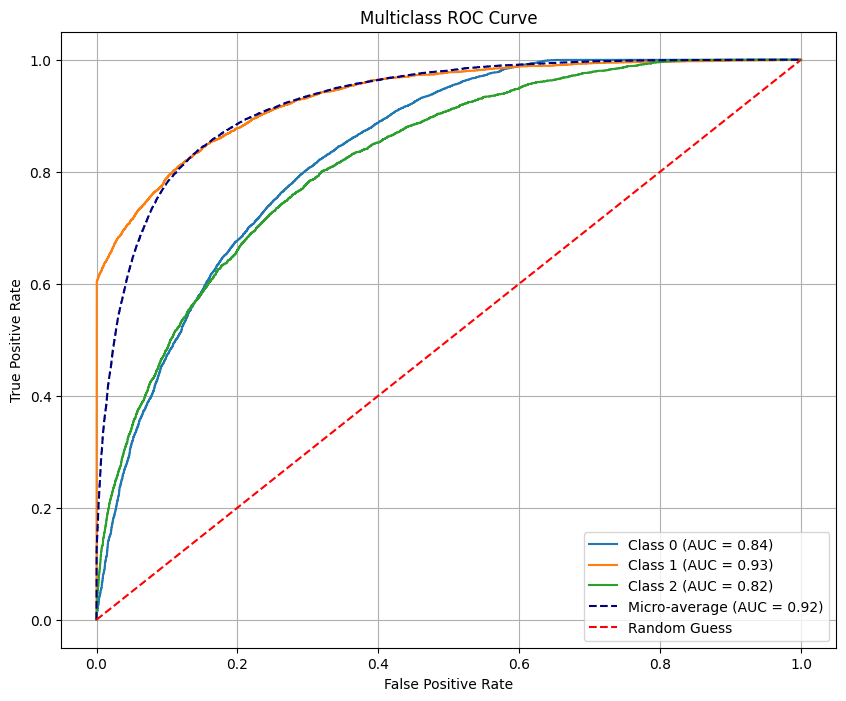

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(new_y_test))
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities
y_pred_probs = best_lgbm.predict_proba(new_X_test)

# Initialize variables for micro-averaged ROC
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(
        fpr_dict[i],
        tpr_dict[i],
        label=f"Class {i} (AUC = {roc_auc_dict[i]:.2f})",
    )

# Plot micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(
    fpr_micro,
    tpr_micro,
    label=f"Micro-average (AUC = {roc_auc_micro:.2f})",
    color="navy",
    linestyle="--",
)

# Random guess line
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")

plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2387
[LightGBM] [Info] Number of data points in the train set: 5789, number of used features: 10
[LightGBM] [Info] Start training from score -0.425971
[LightGBM] [Info] Start training from score -1.552203
[LightGBM] [Info] Start training from score -2.001860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of data points in the train set: 8531, number of used features: 10
[LightGBM] [Info] Start training from score -0.422548
[LightGBM] [Info] Start training from score -1.585807
[LightGBM] [Info] Start training from score -1.967235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 secon

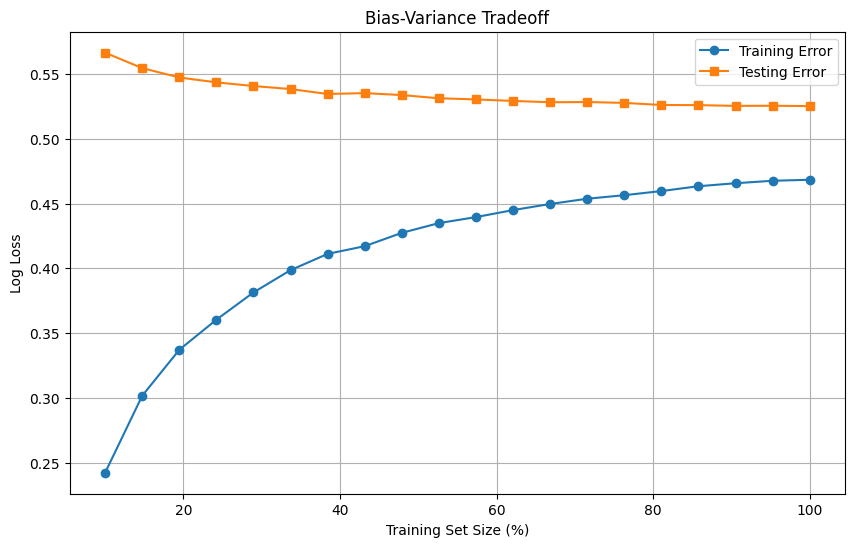

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Define arrays to store training and testing errors
train_errors = []
test_errors = []

# Split the training data into increments
train_sizes = np.linspace(0.1, 1.0, 20)  # Use 10 increments from 10% to 100% of the training data

for train_size in train_sizes:
    # Split the dataset into smaller subsets
    train_subset_size = int(train_size * len(new_X_df))
    X_train_subset = new_X_df[:train_subset_size]
    y_train_subset = new_y_df[:train_subset_size]

    # Train the model on the subset
    best_lgbm.fit(X_train_subset, y_train_subset)

    # Compute training log-loss (or error)
    y_train_pred_probs = best_lgbm.predict_proba(X_train_subset)
    train_error = log_loss(y_train_subset, y_train_pred_probs)
    train_errors.append(train_error)

    # Compute test log-loss (or error)
    y_test_pred_probs = best_lgbm.predict_proba(new_X_test)
    test_error = log_loss(new_y_test, y_test_pred_probs)
    test_errors.append(test_error)

# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_errors, label="Training Error", marker='o')
plt.plot(train_sizes * 100, test_errors, label="Testing Error", marker='s')
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()
plt.show()


In [131]:
print("OBSERVATIONS")
print("""
Gap Between Training and Testing Error:
Observation: The gap between training and testing error remains relatively small as training size increases.
Insight: A small error gap indicates that the model generalizes well and does not overfit excessively.""")

print("""
WHY WE APPLIED GRID SEARCH AND WHY THE ACCURACY IS NOT IMPROVING

Log Loss as the Metric:

Observation: Log loss captures the confidence of the model's predictions. A plateau in log loss suggests that the model has reached a limit in improving its predictive probabilities.
Insight: If further improvements are desired, consider:
Tuning hyperparameters (e.g., increasing num_leaves or adjusting learning_rate).
Trying a more complex model or an ensemble approach.
Collecting additional features or improving feature engineering.""")


print("""
Bias-Variance Balance:
      
Low Training Sizes (10%-20%):
The training error is low, but the testing error is high. This indicates overfitting because the model perfectly fits the small training set but fails to generalize well to the test data (high variance).
Medium to High Training Sizes (40%-100%):
The gap between training and testing error decreases, showing reduced overfitting. This is the region where the model achieves a better bias-variance tradeoff.
Testing error plateaus before training error, which might hint at an inherent limit of the model's complexity or a need for hyperparameter tuning.
""")

OBSERVATIONS

Gap Between Training and Testing Error:
Observation: The gap between training and testing error remains relatively small as training size increases.
Insight: A small error gap indicates that the model generalizes well and does not overfit excessively.

WHY WE APPLIED GRID SEARCH AND WHY THE ACCURACY IS NOT IMPROVING

Log Loss as the Metric:

Observation: Log loss captures the confidence of the model's predictions. A plateau in log loss suggests that the model has reached a limit in improving its predictive probabilities.
Insight: If further improvements are desired, consider:
Tuning hyperparameters (e.g., increasing num_leaves or adjusting learning_rate).
Trying a more complex model or an ensemble approach.

Bias-Variance Balance:
      
Low Training Sizes (10%-20%):
The training error is low, but the testing error is high. This indicates overfitting because the model perfectly fits the small training set but fails to generalize well to the test data (high variance).
Medi